In [2]:
# load the data
import pandas as pd

# Load the datasets
breast_cancer_data = pd.read_csv('ACPs_Breast_cancer.csv')
lung_cancer_data = pd.read_csv('ACPs_Lung_cancer.csv')

# Display the first few rows of each dataset
print("Breast Cancer Dataset:")
print(breast_cancer_data.head())

print("\nLung Cancer Dataset:")
print(lung_cancer_data.head())


Breast Cancer Dataset:
   ID                 sequence        class
0   1    AAWKWAWAKKWAKAKKWAKAA  mod. active
1   2  AIGKFLHSAKKFGKAFVGEIMNS  mod. active
2   3    AWKKWAKAWKWAKAKWWAKAA  mod. active
3   4             ESFSDWWKLLAE  mod. active
4   5             ETFADWWKLLAE  mod. active

Lung Cancer Dataset:
   ID                 sequence           class
0   1  AIGKFLHSAKKFGKAFVGEIMNS     mod. active
1   2            FAKALAKLAKKLL     mod. active
2   3          FAKALKALLKALKAL     mod. active
3   4            FAKFLAKFLKKAL     mod. active
4   5         FAKIIAKIAKIAKKIL  inactive - exp


## RandomForest classifier

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer_data_filtered = breast_cancer_data

# Encode the class labels
label_encoder_breast = LabelEncoder()
breast_cancer_data_filtered.loc[:, 'class_encoded'] = label_encoder_breast.fit_transform(breast_cancer_data_filtered['class'])

label_encoder_lung = LabelEncoder()
lung_cancer_data.loc[:, 'class_encoded'] = label_encoder_lung.fit_transform(lung_cancer_data['class'])

# Vectorize the peptide sequences
vectorizer = CountVectorizer(analyzer='char')
X_breast = vectorizer.fit_transform(breast_cancer_data_filtered['sequence'])
X_lung = vectorizer.fit_transform(lung_cancer_data['sequence'])

# Use encoded class as target variable
y_breast = breast_cancer_data_filtered['class_encoded']
y_lung = lung_cancer_data['class_encoded']

# Split the data into training and testing sets
X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(X_breast, y_breast, test_size=0.2, random_state=42)
X_lung_train, X_lung_test, y_lung_train, y_lung_test = train_test_split(X_lung, y_lung, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_breast_train_res, y_breast_train_res = smote.fit_resample(X_breast_train, y_breast_train)
X_lung_train_res, y_lung_train_res = smote.fit_resample(X_lung_train, y_lung_train)

# Train a RandomForest classifier with class weights on the breast cancer data
clf_breast = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_breast.fit(X_breast_train_res, y_breast_train_res)

# Train a RandomForest classifier with class weights on the lung cancer data
clf_lung = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_lung.fit(X_lung_train_res, y_lung_train_res)

# Evaluate the classifiers
breast_predictions = clf_breast.predict(X_breast_test)
lung_predictions = clf_lung.predict(X_lung_test)

# Print classification reports
print("\nBreast Cancer Classification Report:")
print(classification_report(y_breast_test, breast_predictions, target_names=label_encoder_breast.classes_))

print("\nLung Cancer Classification Report:")
print(classification_report(y_lung_test, lung_predictions, target_names=label_encoder_lung.classes_))



Breast Cancer Classification Report:
                    precision    recall  f1-score   support

    inactive - exp       0.73      0.69      0.71        16
inactive - virtual       0.99      0.99      0.99       157
       mod. active       0.62      0.50      0.55        16
       very active       0.00      0.00      0.00         1

          accuracy                           0.92       190
         macro avg       0.59      0.54      0.56       190
      weighted avg       0.93      0.92      0.92       190


Lung Cancer Classification Report:
                    precision    recall  f1-score   support

    inactive - exp       0.50      0.44      0.47         9
inactive - virtual       0.98      0.99      0.98       149
       mod. active       0.73      0.65      0.69        17
       very active       0.50      0.67      0.57         6

          accuracy                           0.92       181
         macro avg       0.68      0.69      0.68       181
      weighted avg   

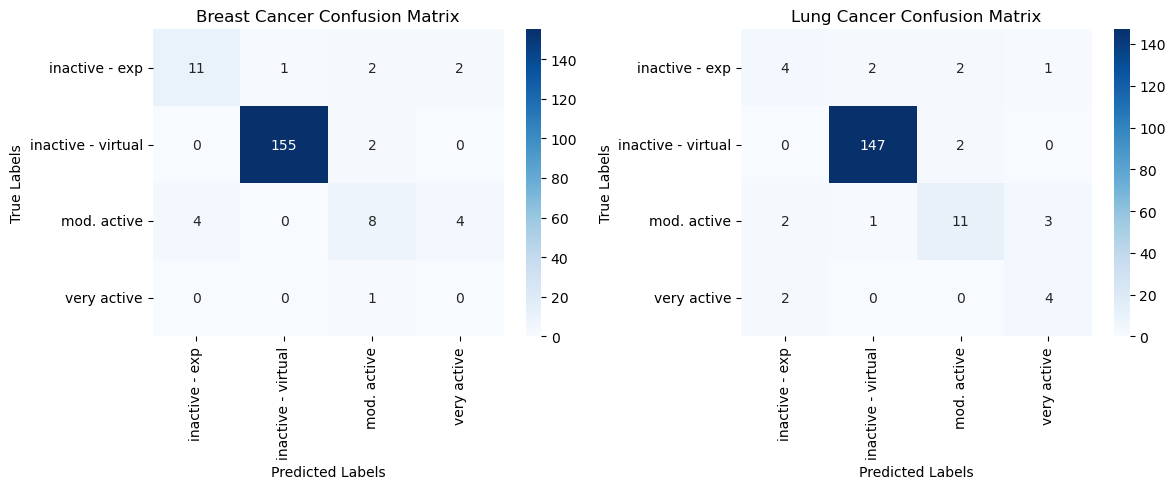

In [13]:
# Compute confusion matrices
cm_breast = confusion_matrix(y_breast_test, breast_predictions)
cm_lung = confusion_matrix(y_lung_test, lung_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Breast cancer confusion matrix
sns.heatmap(cm_breast, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_breast.classes_, yticklabels=label_encoder_breast.classes_, ax=axes[0])
axes[0].set_title('Breast Cancer Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Lung cancer confusion matrix
sns.heatmap(cm_lung, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_lung.classes_, yticklabels=label_encoder_lung.classes_, ax=axes[1])
axes[1].set_title('Lung Cancer Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [4]:
# Get feature importances from the RandomForest classifiers
feature_importances_breast = clf_breast.feature_importances_
feature_importances_lung = clf_lung.feature_importances_

# Identify and analyze the most important features
print("Breast Cancer Feature Importances:\n", feature_importances_breast)
print("Lung Cancer Feature Importances:\n", feature_importances_lung)


Breast Cancer Feature Importances:
 [0.10928889 0.00278995 0.02868375 0.0883647  0.08656688 0.0360646
 0.01101168 0.04036434 0.15164626 0.13398744 0.00669383 0.0376084
 0.02756511 0.04237721 0.03520347 0.02476309 0.02473698 0.04886487
 0.0468361  0.01658244]
Lung Cancer Feature Importances:
 [0.10157672 0.00050282 0.03577484 0.10006391 0.07378836 0.05617292
 0.00892125 0.07707984 0.17152593 0.09925971 0.00381119 0.0222315
 0.01498499 0.03698757 0.0497534  0.04861273 0.01908116 0.0495665
 0.02393676 0.00636788]


In [5]:
# Examine class distribution in the training and test sets
print("Breast Cancer Class Distribution (Training):\n", np.bincount(y_breast_train_res))
print("Breast Cancer Class Distribution (Test):\n", np.bincount(y_breast_test))
print("Lung Cancer Class Distribution (Training):\n", np.bincount(y_lung_train_res))
print("Lung Cancer Class Distribution (Test):\n", np.bincount(y_lung_test))


Breast Cancer Class Distribution (Training):
 [593 593 593 593]
Breast Cancer Class Distribution (Test):
 [ 16 157  16   1]
Lung Cancer Class Distribution (Training):
 [601 601 601 601]
Lung Cancer Class Distribution (Test):
 [  9 149  17   6]


## Cross validation

In [7]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores_breast = cross_val_score(clf_breast, X_breast_train_res, y_breast_train_res, cv=5, scoring='accuracy')
cv_scores_lung = cross_val_score(clf_lung, X_lung_train_res, y_lung_train_res, cv=5, scoring='accuracy')

# Report average performance metrics
print("Breast Cancer Cross-Validation Scores:\n", cv_scores_breast)
print("Average CV Score (Breast Cancer):", np.mean(cv_scores_breast))
print("Lung Cancer Cross-Validation Scores:\n", cv_scores_lung)
print("Average CV Score (Lung Cancer):", np.mean(cv_scores_lung))


Breast Cancer Cross-Validation Scores:
 [0.88210526 0.92       0.93670886 0.90084388 0.91139241]
Average CV Score (Breast Cancer): 0.910210082167444
Lung Cancer Cross-Validation Scores:
 [0.93347193 0.93347193 0.94178794 0.94594595 0.93125   ]
Average CV Score (Lung Cancer): 0.9371855509355509


## ROC curves

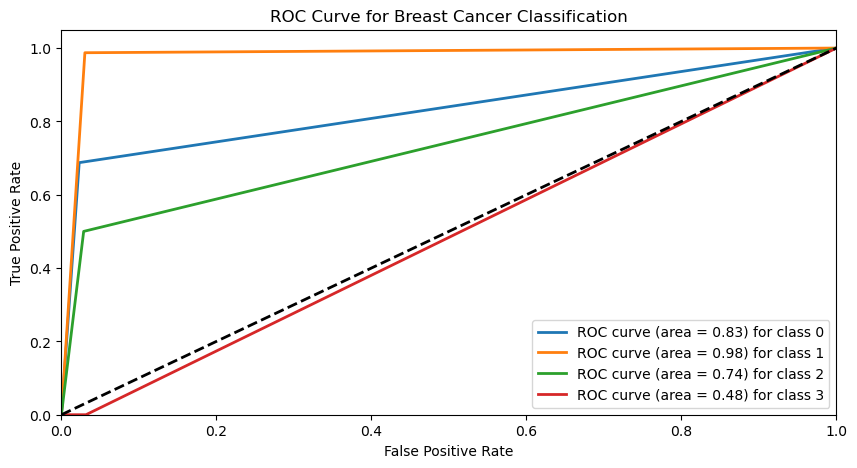

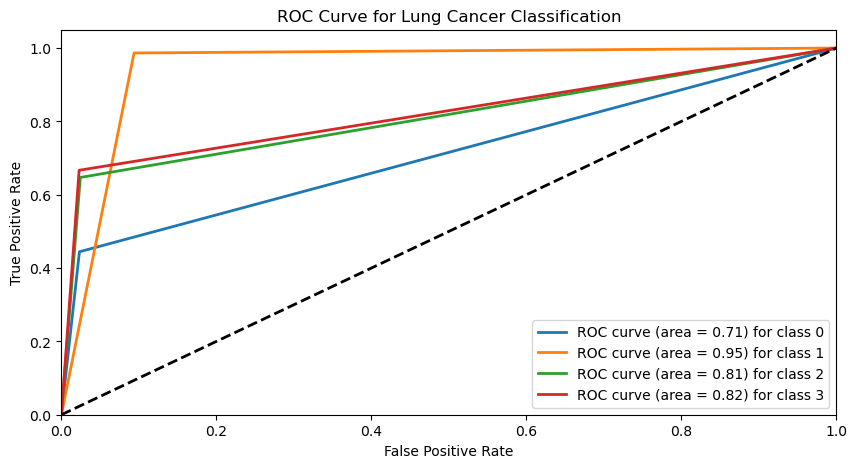

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC computation
y_breast_test_bin = label_binarize(y_breast_test, classes=[0, 1, 2,3])
y_lung_test_bin = label_binarize(y_lung_test, classes=[0, 1, 2, 3])
n_classes_breast = y_breast_test_bin.shape[1]
n_classes_lung = y_lung_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr_breast = dict()
tpr_breast = dict()
roc_auc_breast = dict()
for i in range(n_classes_breast):
    fpr_breast[i], tpr_breast[i], _ = roc_curve(y_breast_test_bin[:, i], breast_predictions == i)
    roc_auc_breast[i] = auc(fpr_breast[i], tpr_breast[i])

fpr_lung = dict()
tpr_lung = dict()
roc_auc_lung = dict()
for i in range(n_classes_lung):
    fpr_lung[i], tpr_lung[i], _ = roc_curve(y_lung_test_bin[:, i], lung_predictions == i)
    roc_auc_lung[i] = auc(fpr_lung[i], tpr_lung[i])

# Plot ROC curves for Breast Cancer
plt.figure(figsize=(10, 5))
for i in range(n_classes_breast):
    plt.plot(fpr_breast[i], tpr_breast[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc_breast[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curves for Lung Cancer
plt.figure(figsize=(10, 5))
for i in range(n_classes_lung):
    plt.plot(fpr_lung[i], tpr_lung[i], lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc_lung[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Lung Cancer Classification')
plt.legend(loc="lower right")
plt.show()


## Best parameters by Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the base model to tune
base_model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_breast_train_res, y_breast_train_res)

# Print best parameters
print("Best parameters found by Grid Search:", grid_search.best_params_)

# Random Search
random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_breast_train_res, y_breast_train_res)

# Print best parameters
print("Best parameters found by Random Search:", random_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found by Grid Search: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by Random Search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}


## Applying the different ML techniques

In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# List of classifiers to experiment with
classifiers = [
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier()
]

# Fit and evaluate each classifier
for clf in classifiers:
    clf.fit(X_breast_train_res, y_breast_train_res)
    breast_predictions = clf.predict(X_breast_test)
    print(f"\nClassifier: {clf.__class__.__name__}")
    print(classification_report(y_breast_test, breast_predictions, target_names=label_encoder_breast.classes_))



Classifier: RandomForestClassifier
                    precision    recall  f1-score   support

    inactive - exp       0.73      0.69      0.71        16
inactive - virtual       0.99      0.99      0.99       157
       mod. active       0.62      0.50      0.55        16
       very active       0.00      0.00      0.00         1

          accuracy                           0.92       190
         macro avg       0.59      0.54      0.56       190
      weighted avg       0.93      0.92      0.92       190


Classifier: GradientBoostingClassifier
                    precision    recall  f1-score   support

    inactive - exp       0.71      0.75      0.73        16
inactive - virtual       0.99      0.96      0.98       157
       mod. active       0.53      0.50      0.52        16
       very active       0.00      0.00      0.00         1

          accuracy                           0.90       190
         macro avg       0.56      0.55      0.56       190
      weighted avg 

## RandomForest classifier with the TF-IDF features

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TfidfVectorizer instead of CountVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='char')

# Vectorize the peptide sequences using TF-IDF
X_breast_tfidf = tfidf_vectorizer.fit_transform(breast_cancer_data_filtered['sequence'])
X_lung_tfidf = tfidf_vectorizer.fit_transform(lung_cancer_data['sequence'])

# Use encoded class as target variable
y_breast = breast_cancer_data_filtered['class_encoded']
y_lung = lung_cancer_data['class_encoded']

# Split the data into training and testing sets
X_breast_train_tfidf, X_breast_test_tfidf, y_breast_train_tfidf, y_breast_test_tfidf = train_test_split(X_breast_tfidf, y_breast, test_size=0.2, random_state=42)
X_lung_train_tfidf, X_lung_test_tfidf, y_lung_train_tfidf, y_lung_test_tfidf = train_test_split(X_lung_tfidf, y_lung, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
X_breast_train_res_tfidf, y_breast_train_res_tfidf = smote.fit_resample(X_breast_train_tfidf, y_breast_train_tfidf)
X_lung_train_res_tfidf, y_lung_train_res_tfidf = smote.fit_resample(X_lung_train_tfidf, y_lung_train_tfidf)

# Train a RandomForest classifier with the TF-IDF features
clf_breast_tfidf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_breast_tfidf.fit(X_breast_train_res_tfidf, y_breast_train_res_tfidf)

clf_lung_tfidf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_lung_tfidf.fit(X_lung_train_res_tfidf, y_lung_train_res_tfidf)

# Evaluate the classifiers
breast_predictions_tfidf = clf_breast_tfidf.predict(X_breast_test_tfidf)
lung_predictions_tfidf = clf_lung_tfidf.predict(X_lung_test_tfidf)

# Print classification reports
print("\nBreast Cancer Classification Report (TF-IDF):")
print(classification_report(y_breast_test_tfidf, breast_predictions_tfidf, target_names=label_encoder_breast.classes_))

print("\nLung Cancer Classification Report (TF-IDF):")
print(classification_report(y_lung_test_tfidf, lung_predictions_tfidf, target_names=label_encoder_lung.classes_))



Breast Cancer Classification Report (TF-IDF):
                    precision    recall  f1-score   support

    inactive - exp       0.86      0.75      0.80        16
inactive - virtual       0.98      0.99      0.98       157
       mod. active       0.67      0.62      0.65        16
       very active       0.00      0.00      0.00         1

          accuracy                           0.93       190
         macro avg       0.63      0.59      0.61       190
      weighted avg       0.94      0.93      0.93       190


Lung Cancer Classification Report (TF-IDF):
                    precision    recall  f1-score   support

    inactive - exp       0.45      0.56      0.50         9
inactive - virtual       0.96      0.99      0.97       149
       mod. active       0.69      0.53      0.60        17
       very active       0.50      0.33      0.40         6

          accuracy                           0.90       181
         macro avg       0.65      0.60      0.62       181
   